# Time Series Analysis of Air Travelers

# And Forecasting using FbProphet

#### Prophet is a forecasting procedure implemented in R and Python. It is fast and provides completely automated forecasts that can be tuned by hand by data scientists and analysts.

***

In [2]:
import pandas as pd
import numpy as np

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
import fbprophet

In [7]:
df = pd.read_csv('Travelling Passenger count.csv')

In [8]:
df.head()

,Month,Passengers in Thousands
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


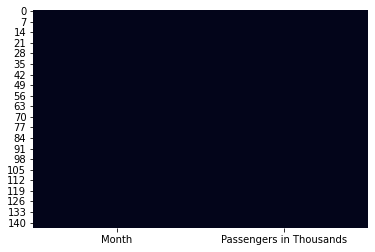

In [10]:
# Looking for Null values
sns.heatmap(df.isnull(), cbar=False)

So, no null values in this dataset to worry about !

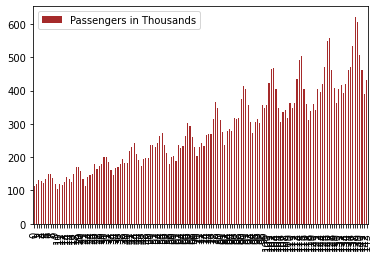

In [29]:
df.plot( color='brown', kind = 'bar')

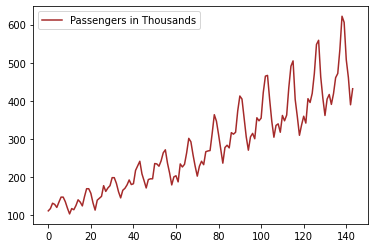

In [27]:
df.plot( color='brown')

In [31]:
# Renaming column 
df.columns = ['ds','y']

In [32]:
df.tail()

,ds,y
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [33]:
# Converting date to datetime

df['ds'] = pd.to_datetime(df['ds'])

In [34]:
df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


## Importing Prophet

In [35]:
from fbprophet import Prophet

In [39]:
##  Inbuilt Functions of Prophet !
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_column_matrix',
 'sample_model',
 'sample_posterior_predictive',
 'sample_pre

## Creating Model

In [40]:
model=Prophet()

In [41]:
df.columns

Index(['ds', 'y'], dtype='object')

### Fitting the Model

In [43]:
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [46]:
df.tail()

,ds,y
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390
143,1960-12-01,432


Now, Creating and adding 365 days to the data df !

In [47]:
new_dates=model.make_future_dataframe(periods=365)

In [48]:
new_dates.tail()

,ds
504,1961-11-27
505,1961-11-28
506,1961-11-29
507,1961-11-30
508,1961-12-01


Another year has been added !

## Predicting..

In [49]:
prediction=model.predict(new_dates)

In [50]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,106.583811,56.491097,111.633815,106.583811,106.583811,-21.946575,-21.946575,-21.946575,-21.946575,-21.946575,-21.946575,0.0,0.0,0.0,84.637236
1,1949-02-01,108.760063,49.370016,106.001676,108.760063,108.760063,-30.707281,-30.707281,-30.707281,-30.707281,-30.707281,-30.707281,0.0,0.0,0.0,78.052782
2,1949-03-01,110.725710,80.361921,138.994535,110.725710,110.725710,-0.469476,-0.469476,-0.469476,-0.469476,-0.469476,-0.469476,0.0,0.0,0.0,110.256234
3,1949-04-01,112.901962,80.035708,137.672530,112.901962,112.901962,-5.166670,-5.166670,-5.166670,-5.166670,-5.166670,-5.166670,0.0,0.0,0.0,107.735292
4,1949-05-01,115.008012,83.379870,141.954345,115.008012,115.008012,-3.765920,-3.765920,-3.765920,-3.765920,-3.765920,-3.765920,0.0,0.0,0.0,111.242092


### Plotting the Predictions !

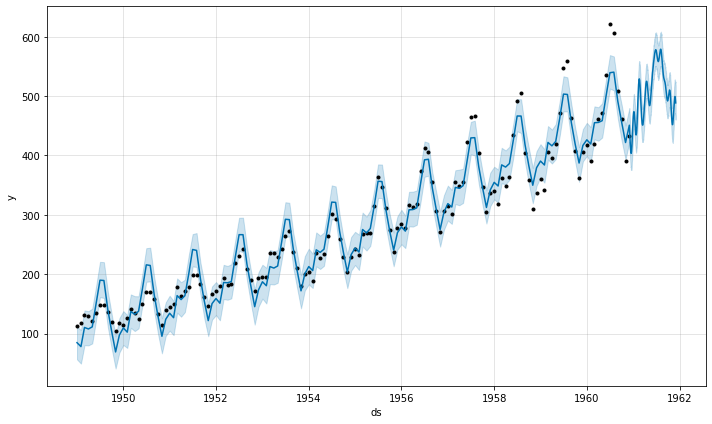

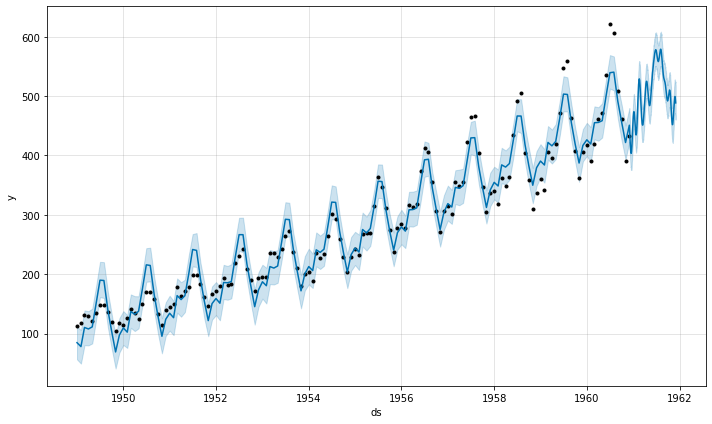

In [53]:
model.plot(prediction)

### Getting projections of Yearly Trend

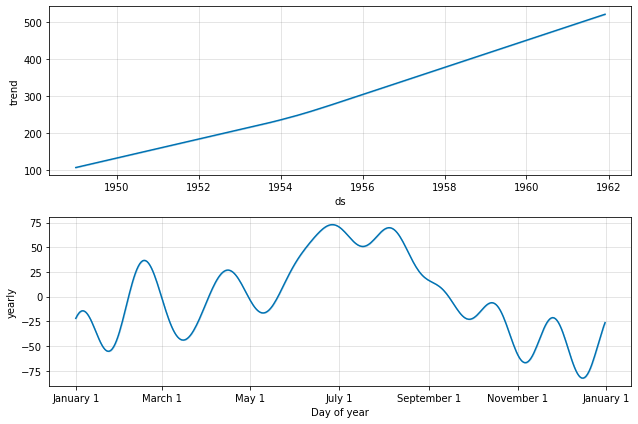

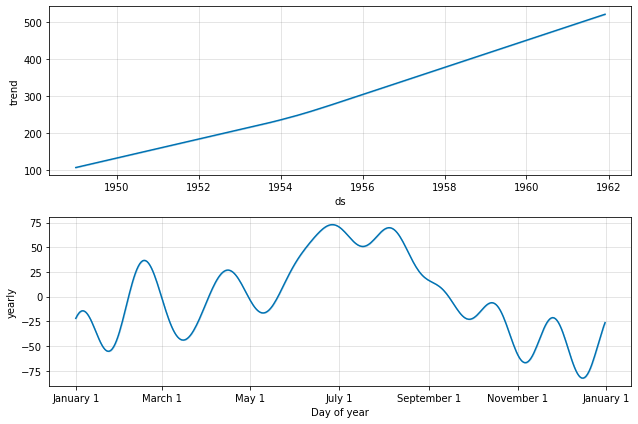

In [60]:
model.plot_components(prediction)

# Doing Cross Validation

#### *Measuring the Forecast Error by Comparing the Predicted values with Actual values!*

In [61]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon = '365 days')

INFO:fbprophet:Making 19 forecasts with cutoffs between 1951-01-18 00:00:00 and 1959-12-02 00:00:00
INFO:fbprophet:n_changepoints greater than number of observations.Using 19.
INFO:fbprophet:n_changepoints greater than number of observations.Using 23.


In [62]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1951-02-01,158.482129,158.172526,158.764856,150,1951-01-18
1,1951-03-01,171.498221,170.392663,172.431349,178,1951-01-18
2,1951-04-01,159.630469,157.270971,161.549062,163,1951-01-18
3,1951-05-01,144.280404,140.598557,147.534167,172,1951-01-18
4,1951-06-01,178.395560,173.339899,183.096178,178,1951-01-18


## Performance Matrix
Mean Squared Error(MSE)<br>
Root Mean Squared Error(RMSE)<br>
Mean Absolute Error(MAE)<br>
Mean Absolute Percentage Error(MAPE)<br>
coverage = yhat_upper - yhat_lower

In [64]:
from fbprophet.diagnostics import performance_metrics

df_performance = performance_metrics(df_cv)

In [65]:
df_performance.head()

,horizon,mse,rmse,mae,mape,coverage
0,40 days,1089.123674,33.001874,25.952024,0.078971,0.227273
1,42 days,1014.683902,31.854103,25.290641,0.077224,0.181818
2,46 days,911.993612,30.199232,24.793810,0.079557,0.136364
3,47 days,1046.625579,32.351593,26.911913,0.082348,0.136364
4,48 days,1035.396122,32.177572,26.322507,0.080244,0.181818


In [66]:
df_performance.tail()

,horizon,mse,rmse,mae,mape,coverage
165,359 days,759.757898,27.563706,21.484113,0.067864,0.340909
166,360 days,763.279128,27.627507,21.762430,0.068724,0.318182
167,362 days,856.478387,29.265652,23.019270,0.067790,0.318182
168,364 days,830.223587,28.813601,21.953509,0.064883,0.318182
169,365 days,973.303521,31.197813,23.843666,0.070152,0.363636


### _Plotting Performance Matrix_

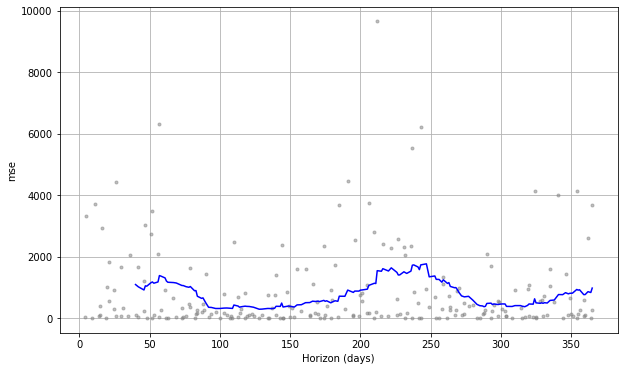

In [68]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mse')

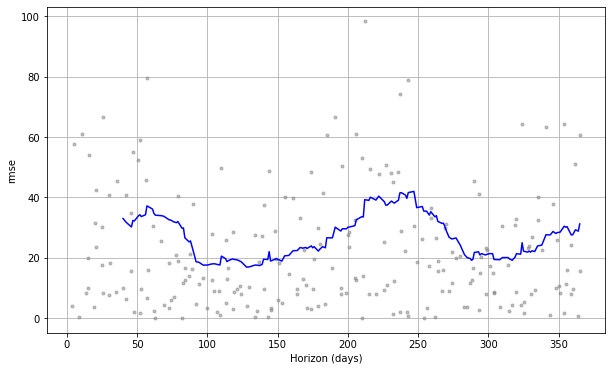

In [69]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')

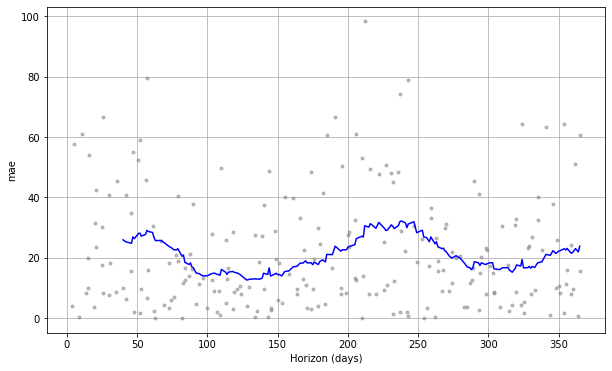

In [70]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mae')

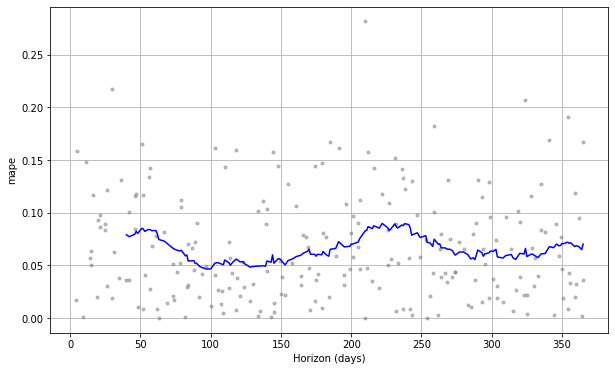

In [71]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

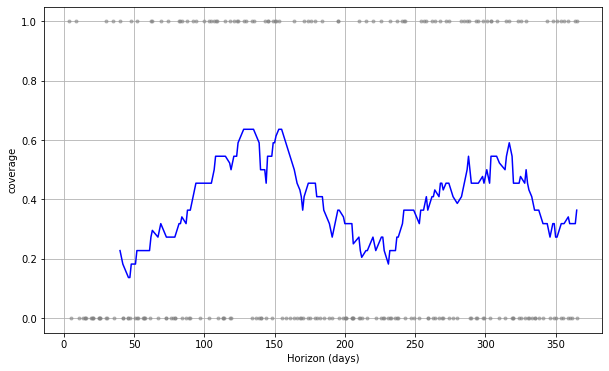

In [72]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='coverage')